Veri Bilimi 101 Proje - Aylin ÖZKAN KELEŞ

Seçilen veri seti: Mental Health in Tech Survey

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Dataseti içeri almak için:

from google.colab import files

uploaded = files.upload()

Saving survey.csv to survey (6).csv


In [ ]:
mhts=pd.read_csv("survey.csv")

In [ ]:
# Datasetin ilk 5 satırını getirerek, kolonları görüntüleyip, veriyi tanımaya başlıyorum.

mhts.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# Datasetin satır ve sütun sayısı:

mhts.shape

(1259, 27)

In [ ]:
# Dataset hakkında genel bilgi için:

mhts.info() #state, self_employed, work_interfere, comments kolonlarında eksik veriler bulunuyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Sayısal kolonların istatistikleri
mhts.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


/tmp/ipython-input-86-3574031172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_ratio.values, y=missing_ratio.index, palette="Reds_r")


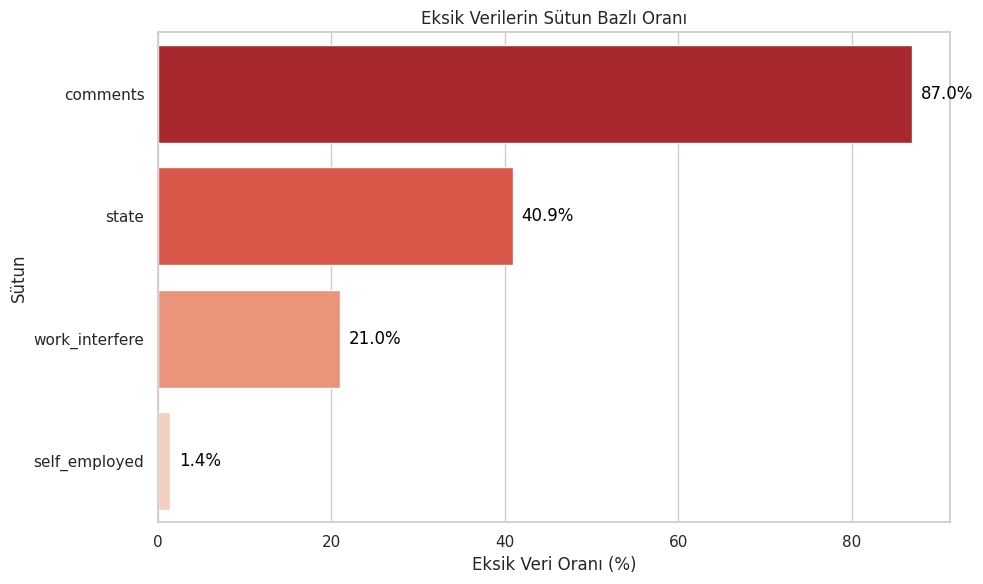

In [ ]:
# Eksik veri oranlarını hesaplama
missing_ratio = mhts.isnull().mean().sort_values(ascending=False) * 100
missing_ratio = missing_ratio[missing_ratio > 0]

# Eksik veri oranlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x=missing_ratio.values, y=missing_ratio.index, palette="Reds_r")
for i, v in enumerate(missing_ratio.values):
    ax.text(v + 1, i, f"{v:.1f}%", color='black', va='center')

plt.xlabel("Eksik Veri Oranı (%)")
plt.ylabel("Sütun")
plt.title("Eksik Verilerin Sütun Bazlı Oranı")
plt.tight_layout()
plt.show()

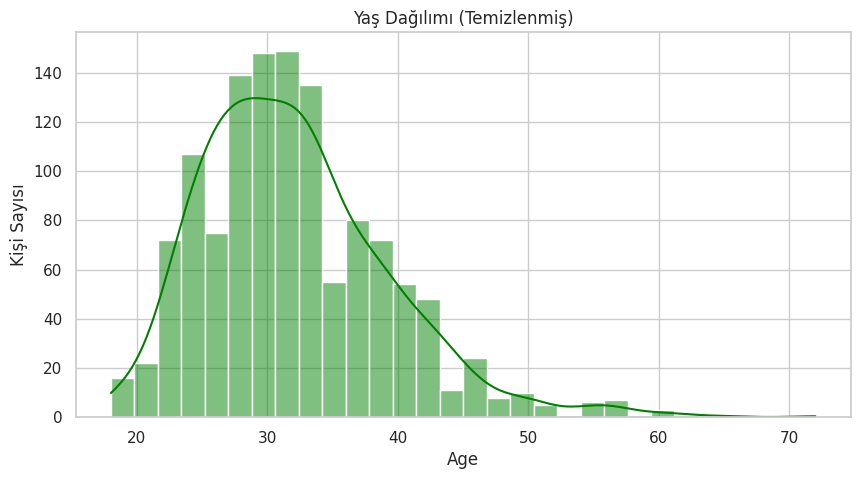

In [ ]:
# Temizlenmiş yaş dağılımını görselleştirme
plt.figure(figsize=(10, 5))
sns.histplot(mhts_cleaned["Age"], bins=30, kde=True, color='green')
plt.title("Yaş Dağılımı (Temizlenmiş)")
plt.xlabel("Age")
plt.ylabel("Kişi Sayısı")
plt.show()


In [ ]:
# Tüm gender değerlerini küçük harfe çevirip boşlukları temizleme
mhts["Gender_cleaned"] = mhts["Gender"].str.lower().str.strip()

# Benzer ifadeleri ortak gruplara ayırma
def simplify_gender(g):
    if "male" in g or g in ["m", "man"]:
        return "Male"
    elif "female" in g or g in ["f", "woman"]:
        return "Female"
    else:
        return "Other"

In [ ]:
mhts["Gender_grouped"] = mhts["Gender_cleaned"].apply(simplify_gender)

/tmp/ipython-input-90-159272380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


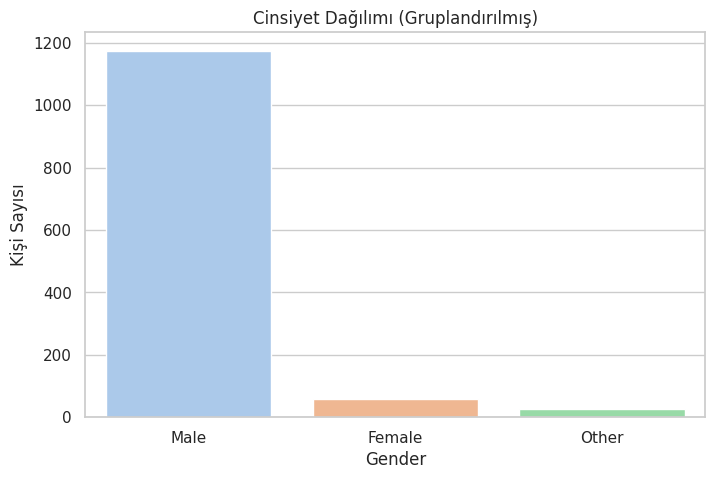

In [ ]:
#Cinsiyet dağılımı görselleştirme

plt.figure(figsize=(8, 5))
sns.countplot(
    data=mhts,
    x="Gender_grouped",
    order=["Male", "Female", "Other"],
    palette="pastel"
)
plt.title("Cinsiyet Dağılımı (Gruplandırılmış)")
plt.xlabel("Gender")
plt.ylabel("Kişi Sayısı")
plt.show()


In [ ]:
# Gereksiz ve çok eksik sütunları çıkarma
mhts.drop(columns=["comments", "state"], inplace=True)

In [ ]:
# Az eksik ama anlamlı sütunları doldurma
mhts["self_employed"].fillna("No", inplace=True)
mhts["work_interfere"].fillna("Don't know", inplace=True)

/tmp/ipython-input-92-4251525968.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mhts["self_employed"].fillna("No", inplace=True)
/tmp/ipython-input-92-4251525968.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
mhts.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0


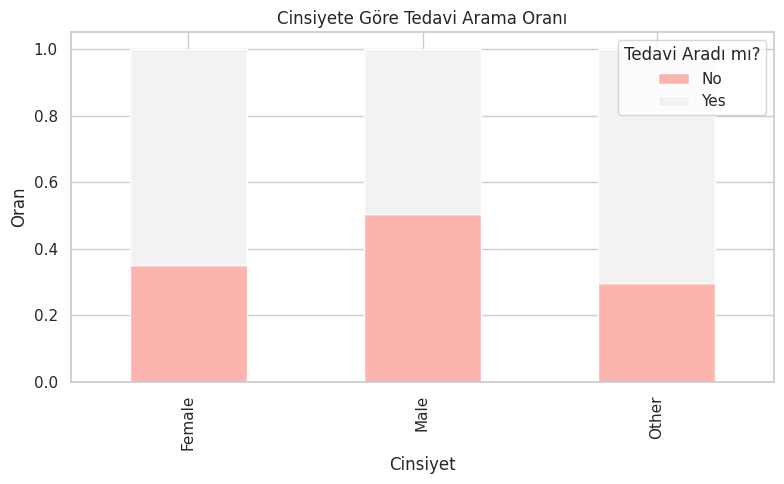

In [ ]:
# Cinsiyete göre tedavi arama oranlarını hesaplama ve grafik
treatment_by_gender = mhts.groupby("Gender_grouped")["treatment"].value_counts(normalize=True).unstack()

treatment_by_gender.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel1")

plt.title("Cinsiyete Göre Tedavi Arama Oranı")
plt.xlabel("Cinsiyet")
plt.ylabel("Oran")
plt.legend(title="Tedavi Aradı mı?")
plt.tight_layout()
plt.show()

# Erkeklerin tedavi arama oranı diğer cinsiyetlere göre daha düşüktür.

/tmp/ipython-input-98-2871485466.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  treatment_by_age = mhts.groupby("age_group")["treatment"].value_counts(normalize=True).unstack()


<Axes: xlabel='age_group'>

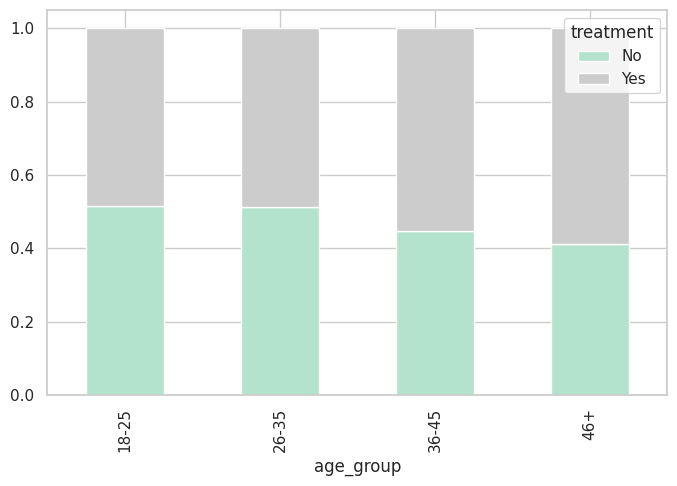

In [ ]:
#Yaş gruplarına göre tedavi arama oranları

# Yaşların gruplara ayrılması
bins = [17, 25, 35, 45, 100]
labels = ['18-25', '26-35', '36-45', '46+']
mhts["age_group"] = pd.cut(mhts["Age"], bins=bins, labels=labels)

# Gruplara göre tedavi oranlarının hesabı
treatment_by_age = mhts.groupby("age_group")["treatment"].value_counts(normalize=True).unstack()
# Görselleştirme
treatment_by_age.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Pastel2")

# Yaş gruplarına göre tedavi arama oranları dengelidir.

<Axes: xlabel='family_history'>

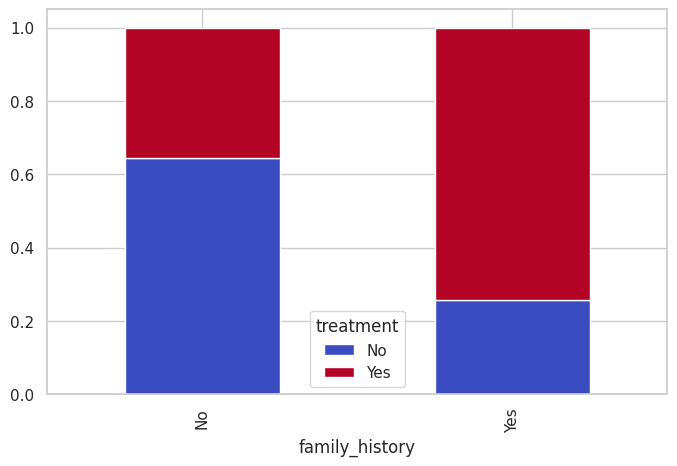

In [ ]:
# Aile ruh sağlığı geçmişine göre tedavi arama oranları görselleştirme
treatment_by_family = mhts.groupby("family_history")["treatment"].value_counts(normalize=True).unstack()
treatment_by_family.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")

# Ailesinde ruh sağlığı geçmişi olanların tedavi arama oranı daha yüksek çıkmıştır.

Modelleme

In [ ]:
y = mhts["treatment"]
y = y.map({"Yes": 1, "No": 0})

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Kullanılacak sütunlar
selected_columns = [
    "Age", "Gender_grouped", "self_employed", "family_history", "work_interfere",
    "no_employees", "remote_work", "benefits", "care_options", "wellness_program",
    "seek_help", "anonymity", "leave", "mental_health_consequence", "phys_health_consequence"
]

# 2. Özellikler ve hedef değişkeni ayırma
X = mhts[selected_columns].copy()         # Özellikler
y = mhts["treatment"].map({"Yes": 1, "No": 0})  # Hedef (binary)

# 3. Kategorik sütunları tespit etme
categorical_columns = X.select_dtypes(include="object").columns

# 4. Kategorik sütunları sayıya çevirme (Label Encoding)
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # stringe çevirerek hataları önleme
    label_encoders[col] = le  # gerektiğinde geri çevirmek için saklama

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Veriyi eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,         # %20 test
    random_state=42,       # tekrar edilebilir sonuçlar için
    stratify=y)             # sınıf oranlarını koruma

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (1007, 15)
X_test : (252, 15)
y_train: (1007,)
y_test : (252,)


In [ ]:
# Verinin %80’i eğitim, %20’si test için ayrıldı.

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Test verisiyle tahmin yapma
y_pred = model.predict(X_test)

# Confusion matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred)

# Sınıflandırma raporunu üretme
report = classification_report(
    y_test, y_pred,
    target_names=["Tedavi Aramadı", "Tedavi Aradı"])

print("🔹 Confusion Matrix:\n", conf_matrix)
print("\n🔹 Sınıflandırma Raporu:\n", report)

🔹 Confusion Matrix:
 [[ 94  30]
 [ 23 105]]

🔹 Sınıflandırma Raporu:
                 precision    recall  f1-score   support

Tedavi Aramadı       0.80      0.76      0.78       124
  Tedavi Aradı       0.78      0.82      0.80       128

      accuracy                           0.79       252
     macro avg       0.79      0.79      0.79       252
  weighted avg       0.79      0.79      0.79       252



/tmp/ipython-input-117-3904069702.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


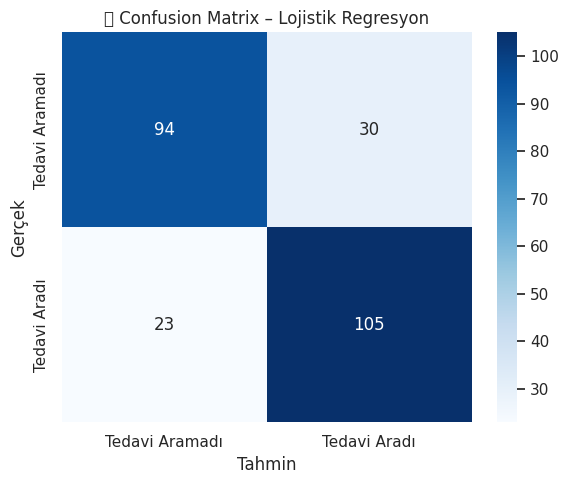

In [ ]:
# Confusion Matrix görselleştirme
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap="Blues",
    xticklabels=["Tedavi Aramadı", "Tedavi Aradı"],
    yticklabels=["Tedavi Aramadı", "Tedavi Aradı"])

plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("📊 Confusion Matrix – Lojistik Regresyon")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

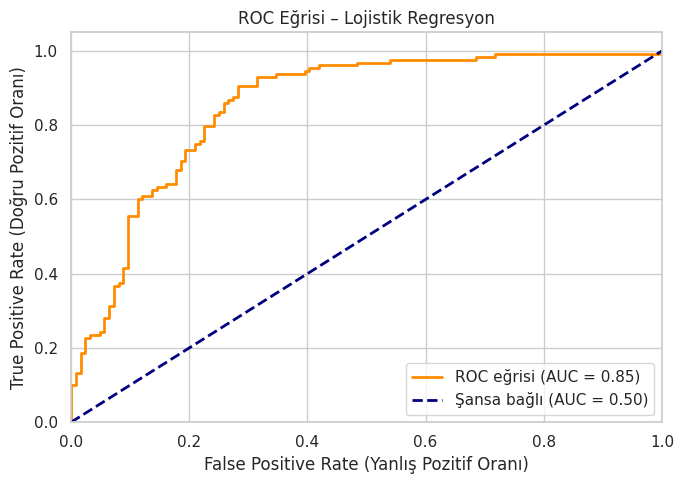

In [ ]:
# Modelin pozitif sınıf için tahmin olasılıklarını alma
y_prob = model.predict_proba(X_test)[:, 1]

# ROC eğrisi için gerekli fpr (False Positive Rate), tpr (True Positive Rate) ve threshold'ları hesaplama
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC (Area Under Curve) skorunu hesaplama
roc_auc = roc_auc_score(y_test, y_prob)

# ROC eğrisini çizme
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Şansa bağlı (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.title('ROC Eğrisi – Lojistik Regresyon')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# AUC Skoru
roc_auc = roc_auc_score(y_test, y_prob)
print("AUC: {:.2f}".format(roc_auc))

AUC: 0.85


/tmp/ipython-input-122-565416069.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-122-565416069.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


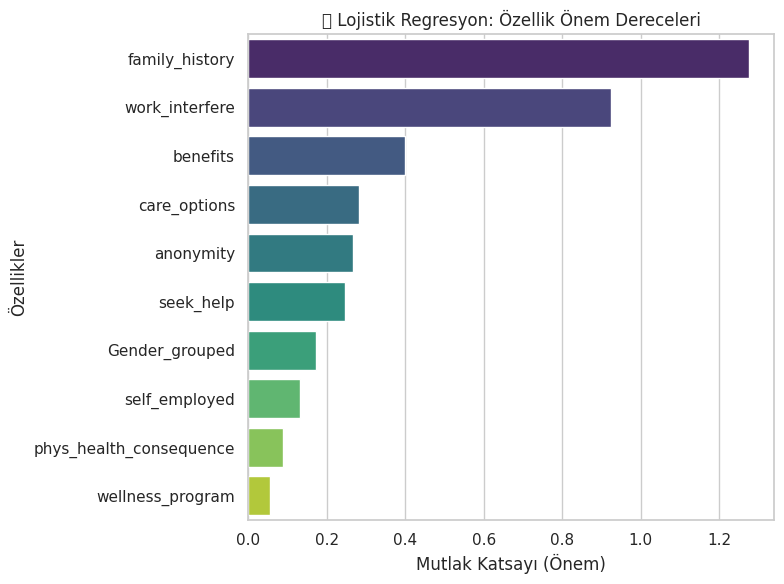

In [ ]:
# Özellik adlarını alma
feature_names = X.columns

# Modelin katsayılarını alma (her özelliğin modeldeki etkisi)
coefficients = model.coef_[0]  # .coef_ her sınıf için katsayılar döner → [0] ile 1. sınıfı alıyoruz

# DataFrame oluşturma: hem katsayıları hem mutlak değerlerini gösterme
importance_df = pd.DataFrame({
    "Özellik": feature_names,
    "Katsayı": coefficients,
    "Önemi (|değer|)": np.abs(coefficients)})

# Önem sırasına göre sıralama
importance_df = importance_df.sort_values(by="Önemi (|değer|)", ascending=False)

# En önemli 10 özellik
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Önemi (|değer|)",
    y="Özellik",
    data=importance_df.head(10),
    palette="viridis")
plt.title("🔍 Lojistik Regresyon: Özellik Önem Dereceleri")
plt.xlabel("Mutlak Katsayı (Önem)")
plt.ylabel("Özellikler")
plt.tight_layout()
plt.show()
